## Import

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from lmfit import Model
from lmfit import Parameter, Parameters
from sympy import nsolve

np.random.seed(0)

In [ ]:
# Nelson-Siegel function
# https://www.anbima.com.br/data/files/EC/C6/5D/4B/47CFD71028DFACD76B2BA2A8/Metodologia_Curva%20de%20Credito_out21.pdf
# page 4

def r_ns(
        x: np.ndarray,
        beta0: float,
        beta1: float,
        beta2: float,
        lam: float
    ) -> np.ndarray:
    term1 = (1 - np.exp(-lam * x)) / (lam * x)
    term2 = term1 - np.exp(-lam * x)
    return beta0 + beta1 * term1 + beta2 * term2


## Generate data

In [33]:
# https://www.desmos.com/calculator/xzgg8rqrwg
b0 = 2.0
b1 = -2.0
b2 = 1.0
l = 0.8
x = np.linspace(0, 10, 50)[1:]
y = r_ns(x = x, beta0 = b0, beta1 = b1, beta2 = b2, lam=l)
y2 = y + np.random.randn(len(y))*0.1

In [4]:
def plot_function(x: np.ndarray, y: np.ndarray, y_fit: np.ndarray = None):
    fig, ax = plt.subplots(1, 1, dpi = 150, figsize = (12, 6))
    ax.grid(alpha = 0.5, zorder = -3)
    if y_fit is not None:
        ax.plot(x, y_fit, lw = 2.0, c = "red")
    ax.scatter(x, y2, s = 5.0, zorder = 1)
    plt.tight_layout()
    plt.show()

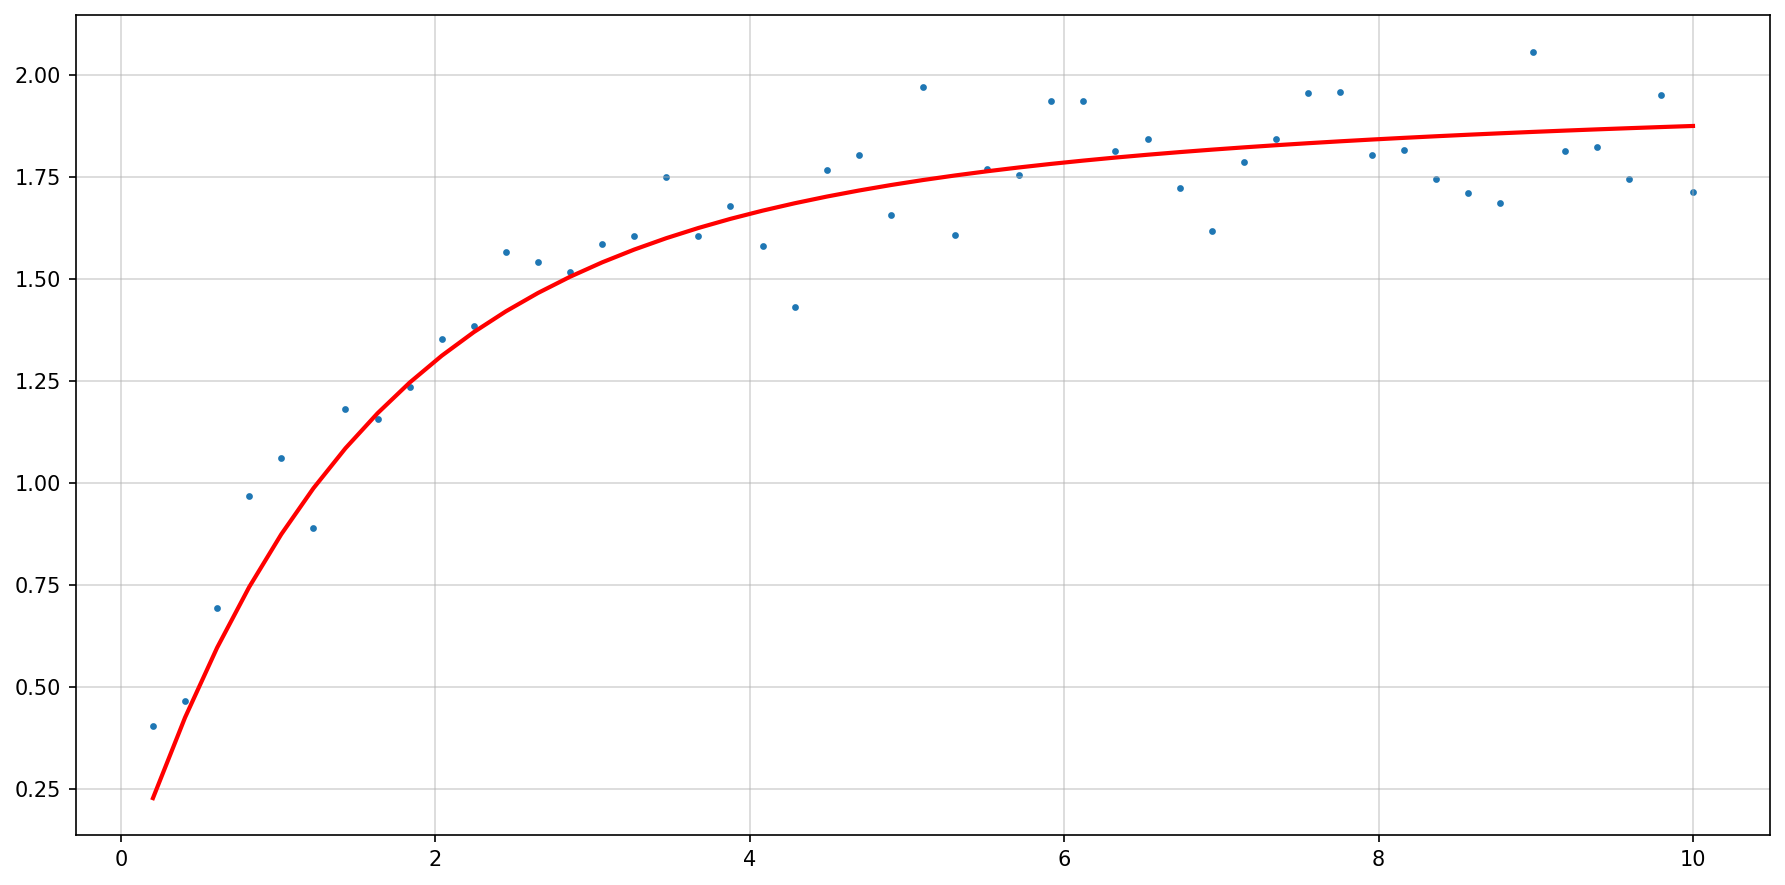

In [5]:
plot_function(x, y2, y)

In [6]:
model = Model(r_ns)

In [18]:
params = Parameters()
params.add_many(
    Parameter("beta0", value=2.0, vary = True, min=0.0),
    Parameter("beta1", value=-2.0, vary = True),
    Parameter("beta2", value=1.0, vary = True),
    Parameter("lam", value=2.0, vary = True, min=0.0),
)
result = model.fit(
    y2,
    x=x,
    params=params,
)
map_parameter_value={
                param_name: result.params[param_name].value
                for param_name in model.param_names
            }

In [19]:
map_parameter_value

{'beta0': 1.9891794106085223,
 'beta1': -1.7542968928810887,
 'beta2': -1.1619407707521965,
 'lam': 2.2322708762575347}

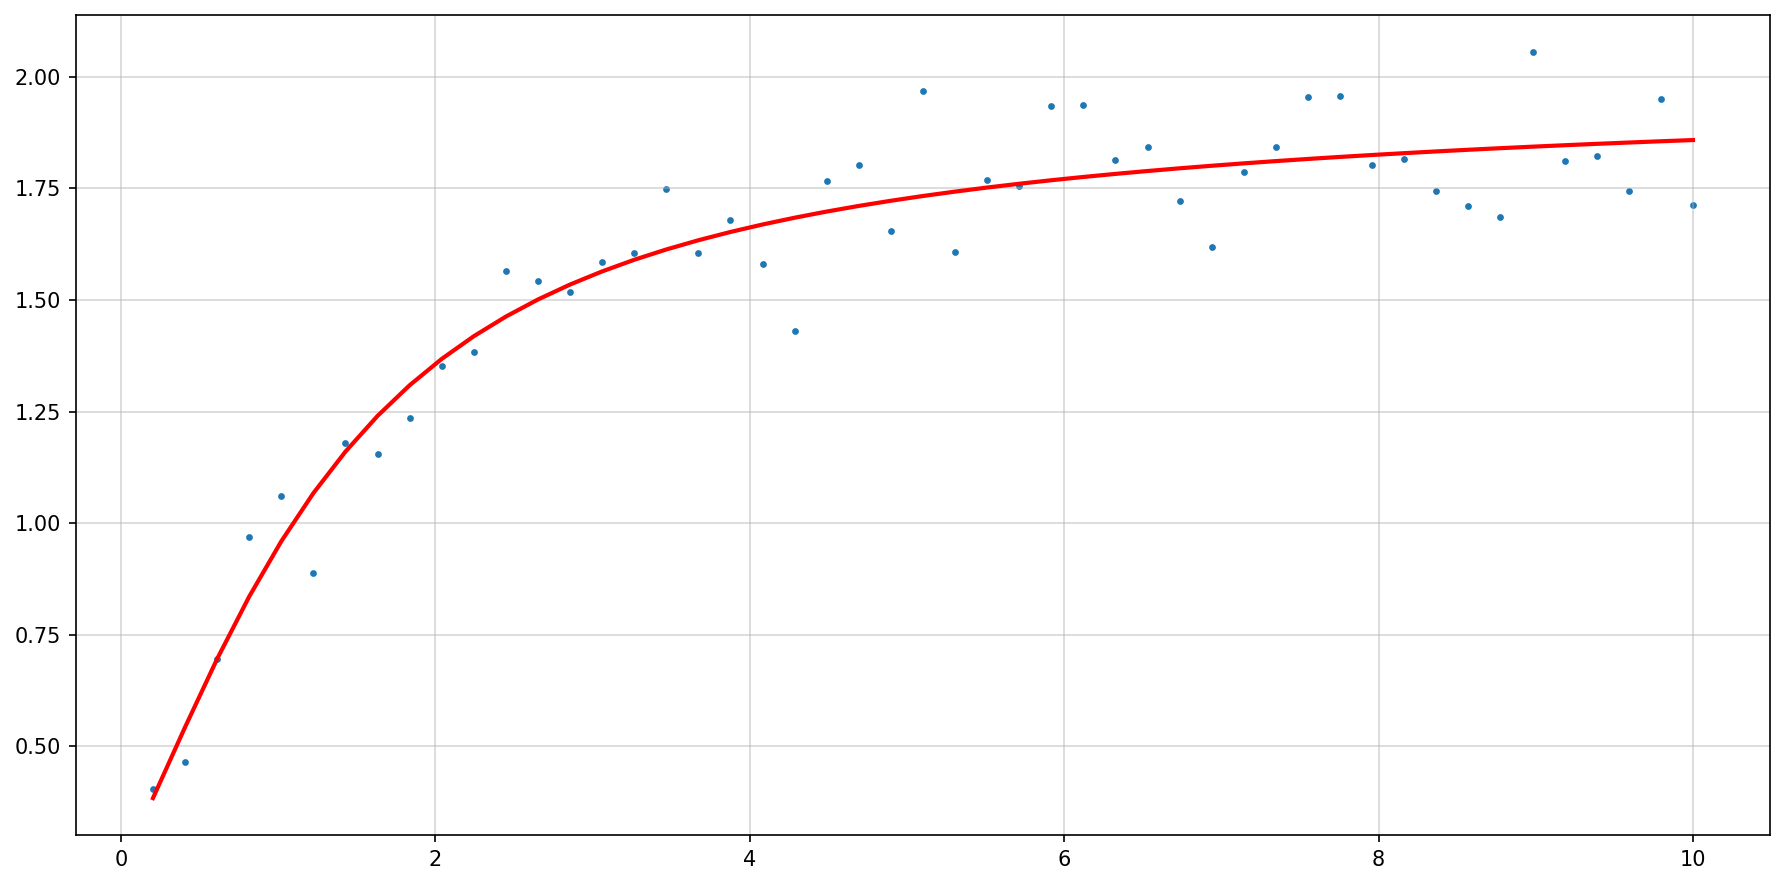

In [20]:
y_fit = r_ns(x, **map_parameter_value)
plot_function(x, y2, y_fit)

In [42]:
x_sympy = sp.Symbol('x')
beta0_sympy, beta1_sympy, beta2_sympy = sp.symbols('beta0 beta1 beta2')
lam_sympy = sp.Symbol('lam')
x1_sympy, y1_sympy = sp.symbols('x1 y1')

# Nelson-Siegel function
# https://www.anbima.com.br/data/files/EC/C6/5D/4B/47CFD71028DFACD76B2BA2A8/Metodologia_Curva%20de%20Credito_out21.pdf
# page 4
def r_ns_sympy(x, beta0, beta1, beta2, lam):
    term1_sympy = (1 - sp.exp(-lam * x)) / (lam * x)
    term2_sympy = term1_sympy - sp.exp(-lam * x)
    return beta0 + beta1 * term1_sympy + beta2 * term2_sympy

# Criar a função r(x)
r_sympy = r_ns_sympy(x_sympy, beta0_sympy, beta1_sympy, beta2_sympy, lam_sympy)

# Derivada de r(x) em relação a x
drdx_sympy = sp.diff(r_sympy, x_sympy)

equation = 2 * (x_sympy - x1_sympy) + 2 * drdx_sympy * (r_sympy - y1_sympy)
substitutions = {
    "beta0": 2.0,
    "beta1": -2.0,
    "beta2": 1.0,
    "lam": 0.8,
    "x1": x[0],
    "y1": y[0],
}


In [43]:
numeric_equation = equation.subs(substitutions)
print(numeric_equation)

2*x + (1.7720001900874 - 1.0*exp(-0.8*x) - 1.25*(1 - exp(-0.8*x))/x)*(1.6*exp(-0.8*x) - 2.0*exp(-0.8*x)/x + 2.5*(1 - exp(-0.8*x))/x**2) - 0.408163265306122


In [46]:
x[0]

0.20408163265306123

In [54]:
# Solve for x_sympy
solution = nsolve(numeric_equation, x_sympy, 0.5)

In [56]:
float(solution)

0.20408163265306137